## Lab 7: Sequence Characteristics, Part 2

##### Q0: What's your name?

### Predict characteristics of your protein

* Retrieve a protein sequence from NCBI

* Retrieve some of the properties of the sequence: molecular weight, aromaticity, isoelectric point, structure instability.

* Plot proportion of amino acids, flexibility and hydrophobicity


In [1]:
from Bio import Entrez # we'll import a set of code written for common biological applications
from Bio import SeqIO

In [2]:
prot_id = "NP_000079.2" #the accession number of our protein of interest

In [3]:
Entrez.email = "Andrew.JudellHalf001@umb.edu" # let NCBI know who you are
handle = Entrez.efetch(db="protein", rettype="gb", retmode="text", id=prot_id) # db = database to query, rettype = retrieval type, retmode = retrieval mode 
seq_record = SeqIO.read(handle, "gb") # read the contents "fetched" from NCBI
handle.close()

In [4]:
protdes = seq_record.description # assign the protein's description to protdes
# print the protein  description

protseq = seq_record.seq # pull out the sequence associated with this record
# print the amino acid sequence

# print the number of amino acids in the sequence

Biopython's SeqUtils module contains functions for estimating properties of your protein.   
You can find more information on the class ProteinAnalysis here:  
http://biopython.org/DIST/docs/api/Bio.SeqUtils.ProtParam.ProteinAnalysis-class.html. 

Only run the following code cell, nothing needs to be added.

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import ProtParamData
from Bio import SeqIO

prot = ProteinAnalysis(str(protseq))

print "The predicted molecular weight of", prot_id, "is", prot.molecular_weight(), "Daltons" # molecular weight of your protein in Daltons
print "The relative frequency of phenylalanine, tryptophan, and tyrosine (\"aromaticity\") in", prot_id, "is", prot.aromaticity() # the relative frequency of Phe+Trp+Tyr
print "The predicted isoelectric point of", prot_id, "is", prot.isoelectric_point() # the pH at which the protein has no net charge
print "The instability index of", prot_id, "is", prot.instability_index()  # predicts the instability of the protein, values over 40 suggest an unstable structure 

print round(prot.secondary_structure_fraction()[0]*100, 1), "% of amino acids in", prot_id, "tend to form helices." # returns a tuple of the fraction of amino acids which tend to form helixes, turns or sheets.
print round(prot.secondary_structure_fraction()[1]*100, 1), "% of amino acids in", prot_id, "tend to form turns."
print round(prot.secondary_structure_fraction()[2]*100, 1), "% of amino acids in", prot_id, "tend to form sheets." 

The predicted molecular weight of NP_000079.2 is 138909.8243 Daltons
The relative frequency of phenylalanine, tryptophan, and tyrosine ("aromaticity") in NP_000079.2 is 0.0314207650273
The predicted isoelectric point of NP_000079.2 is 5.60418701172
The instability index of NP_000079.2 is 30.6167349727
11.3 % of amino acids in NP_000079.2 tend to form helices.
51.7 % of amino acids in NP_000079.2 tend to form turns.
18.9 % of amino acids in NP_000079.2 tend to form sheets.


In [ ]:
Display the data type for the object prot

In [6]:
type(prot)

Bio.SeqUtils.ProtParam.ProteinAnalysis

#### Q6: Briefly discuss the relevance of the above characteristics to the biology of your protein.

####Q7: If the amino acids were evenly distributed in your protein, code to express aromaticity of your protein sequence in counts of amino acids Phe,Trp,Tyr, not in percentage as done in method aromaticity( ).

Next generate a graph, with the number of times each amino acid occurs displayed as a percentage of your protein's overall length. 

Only run the following code cell, nothing needs to be added. Read through and make sure you understand what is happening at each step.

Populating the interactive namespace from numpy and matplotlib


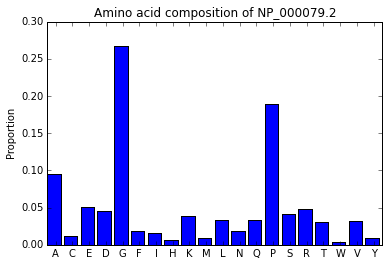

In [7]:
import matplotlib.pyplot as plt # import a set of code written for generating graphics and tell the computer how to display graphs
%pylab inline

percaa = prot.get_amino_acids_percent() # returns a dictionary of the number of times each aa occurs in your protein sequence
amino_a = arange(20) # the x-axis has twenty positions, one for each of the 20 amino acids
bar(amino_a, percaa.values()) # chart will be a bar chart, containing amino acids on the x-axis and count as percent of length of the sequence on the y-axis
xticks(amino_a + 0.5, percaa.keys()) # label the x-axis with the amino acids in the same order as in the counts list
title("Amino acid composition of " + prot_id) #add a title to the graph
ylabel("Proportion") #label the y-axis
show()

#### Q8: Based on the graph you've generated, do the amino acids appear with equal frequency within your protein? What type of amino acids appear over or under represented?

Next generate a graph, with the predicted flexibility values plotted over the length of your protein sequence. Regions with a flexibility index less than 1 are classified as rigid.

Only run the following code cell, nothing needs to be added. Read through and make sure you understand what is happening at each step.

Populating the interactive namespace from numpy and matplotlib


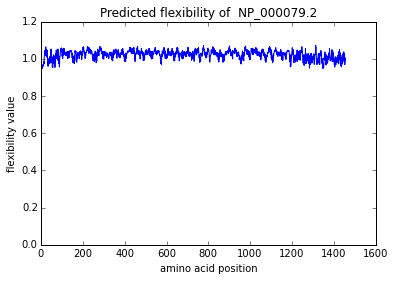

In [8]:
import matplotlib.pyplot as plt # import a set of code written for generating graphics and tell the computer how to display graphs
%pylab inline

flex = prot.flexibility()

plt.plot(flex) # plot the flexibility values
plt.axhline(0, color='black') # forces the y-axis to start at 0
plt.ylabel("flexibility value") # label the y-axis
plt.xlabel("amino acid position") # label the x-axis
plt.title("Predicted flexibility of  " + prot_id) # add a title
plt.show()

#### Q9: Do the predicted flexibility scores differ over the length of your protein?

The distribution of hydrophobic/hydrophilic amino acids throughout a protein sequence is associated with a protein's three-dimensional structure.   

We'll loop over the amino acids in the protein, look up the hydrophobicity value of the amino acid, and generate a graph of the hydrophobicity values across the length of the protein sequence.  

First, we'll generate a dictionary of the amino acids and their hydrophobicity values . . .

Only run the following code cell, nothing needs to be added.

In [7]:
hydro = {"I":4.5, "V":4.2, "L":3.8, "F":2.8, "C":2.5, "M":1.9, "A":1.8, "G":-0.4, "T":-0.7, "S":-0.8, "W":-0.9, "Y":-1.3, "P":-1.6, "H":-3.2, "E":-3.5, "Q":-3.5, "D":-3.5, "N":-3.5, "K":-3.9, "R":-4.5}
print len(hydro)
print type(hydro)

20
<type 'dict'>
<type 'str'>


The more positive the number the more hydrophobic the amino acid.  
The hydrophobicity values were derived from Kyte J, Doolittle RF. (1982) A simple method for displaying the hydropathic character of a protein. J Mol Biol. 157(1):105-32.

Loop over the amino acids in the protein sequence, then look up the amino acid in the hydrophobicity dictionary.

In [10]:
hvalues = {}
for x in protseq:
    if x in hydro:
        
        # hvalues is a empty list to hold the hydrophobicity values along the length of the protein
# for each amino acid in the protein sequence, protseq
    # ask if the amino acid is in the dictionary's keys
        # if so, print the amino acid and it's hydrophobicity value
        # add the hydrophobicity value to the list hvalues
    # if the amino acid is NOT in the dictionary's keys 
        print "Amino acid", aa, "not in dictionary." # print out a warning
        break # stop the flow of the for loop

# Outside the for loop,
# print how many amino acids in your protein sequence were 
# analysed for hydrophobicity

IndentationError: unexpected indent (<ipython-input-10-b2b687701221>, line 7)

Now, let's generate a graph.

Ploting the hydrophobicity of each position in the protein sequence results in a noisy graph. Let's calculate the average hydrophobicity over a sliding window 20 aa in length, and include a red line on the graph at 1.6 on the hydrophobicity scale. Regions with hydrophobicity values greater than 1.6 are more likely to be transmembrane domains.

In [ ]:
window_len = 20 # define the length of the window
smooth_hydro = []# smooth_hydro = a list to hold the moving average values
for i in range(len(hvalues)-window_len): # for each number in a list
    # set the hydrophobicity value, hval, to 0
    for v in hvalues[i:i+window_len]:# for each aa in window
        # increment the value of hval by v
    avh = hval/len(protseq[i:i+window_len]) # when the loop over the slice is complete, calculate the average hydrophobicity value of the region
    # add the average to the list smooth_hydro
    
# Outside the for loop, print the average hydrophobicity of the sequence

We'll generate a graph of the smoothed values.

Only run the following code cell, nothing needs to be added.

In [ ]:
import matplotlib.pyplot as plt # import a set of code written for generating graphics and tell the computer how to display graphs
%pylab inline

plt.plot(smooth_hydro) # plot the value of smooth_hydro
plt.axhline(0, color='grey') # add a horizontal grey line at y=0
plt.axhline(1.6, color='red')# add a horizontal red line at y=1.6
plt.ylabel('Hydrophobicity') # add a label to the y-axis
plt.xlabel('Amino acid position') # add a label to the x-axis
plt.title("Kyte Doolittle Hydrophobicity of " + prot_id + "\n 20 nt sliding window") # add a title to the graph
plt.show()

#### Q10: Based on the graph you've generated, do you think there are any transmembrane domains in your protein? Explain.

That's all folks!  
Please save your notebook and upload the notebook to Blackboard.